# Libraries

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import pystan

In [2]:
my_data = pd.read_csv('./../../Catalogue/binom_reg_dataset.csv')
    
redshifts = my_data['Z']
index     = np.where(redshifts.values<=0.4)

logit_class = my_data['LOGIT_CLASS(1-UVUP;0-UVWEAK)'].values[index]
whan_class  = my_data['WHAN(0-NA;1-RP;2-wA;3-sA;4-SF)'].values[index]
redshift    = redshifts.values[index]
    
idx_na = np.where(whan_class==0)
idx_rp = np.where(whan_class==1)
idx_wa = np.where(whan_class==2)
idx_sa = np.where(whan_class==3)
idx_sf = np.where(whan_class==4)

# STAN Model

### Model for whan_class = na

In [7]:
x0    = redshift[idx_na]
y     = logit_class[idx_na]         # whether this is a galaxy with uv upturn or not
n_obs = x0.size

regression_data = {}
regression_data['K'] = 3      # number of betas
regression_data['X'] = sm.add_constant(np.column_stack((x0, x0**2)))
regression_data['N'] = n_obs
regression_data['Y'] = y
regression_data['LogN'] = np.log(n_obs)
    
# Data to be plotted -------------------------------------------------------------------------------------------
n_obs2 = 50    
x0_sim = np.linspace(x0.min(), x0.max(), n_obs2)

regression_data['X2'] = sm.add_constant(np.column_stack((x0_sim, x0_sim**2)))
regression_data['N2'] = n_obs2
    
print regression_data['X2'].shape

(50, 3)


In [8]:
# Fit: STAN code -----------------------------------------------------------------------------------------------
stan_code = """
data{
    int<lower=0> N;
    int<lower=0> N2;
    int<lower=0> K;
    int Y[N];
    matrix[N,K] X;
    matrix[N2,K] X2;
    real LogN;
    }

parameters{
    vector[K] beta;
    }

transformed parameters{
    vector[N] eta;
    eta = X * beta;
    }

model{
    Y ~ bernoulli_logit(eta);
    }

generated quantities{
    /* real LLi[N2]; */
    /* real AIC; */ 
    /* real BIC; */
    /* real LogL; */
    vector[N2] etanew;
    real<lower=0, upper=1.0> pnew[N2];
    etanew = X2 * beta;
    for (j in 1:N2){
        pnew[j] = inv_logit(etanew[j]);
        /* LLi[j] = bernoulli_lpmf(1|pnew[j]); */
        }
    /* LogL = sum(LLi); */
    /* AIC = -2 * LogL + 2 * K; */
    /* BIC = -2 * LogL + LogN * K; */
    }
#     """

fit_0 = pystan.stan(model_code=stan_code, data=regression_data, iter=5000, chains=3, warmup=2000, n_jobs=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_90c13bbbd691852af182d632c0477dcb NOW.


### Model for whan_class = rp

In [9]:
x0    = redshift[idx_rp]
y     = logit_class[idx_rp]         # whether this is a galaxy with uv upturn or not
n_obs = x0.size

regression_data = {}
regression_data['K'] = 3      # number of betas
regression_data['X'] = sm.add_constant(np.column_stack((x0, x0**2)))
regression_data['N'] = n_obs
regression_data['Y'] = y
regression_data['LogN'] = np.log(n_obs)
    
# Data to be plotted -------------------------------------------------------------------------------------------
n_obs2 = 50    
x0_sim = np.linspace(x0.min(), x0.max(), n_obs2)

regression_data['X2'] = sm.add_constant(np.column_stack((x0_sim, x0_sim**2)))
regression_data['N2'] = n_obs2
    
print regression_data['X2'].shape

(50, 3)


In [10]:
# Fit: STAN code -----------------------------------------------------------------------------------------------
stan_code = """
data{
    int<lower=0> N;
    int<lower=0> N2;
    int<lower=0> K;
    int Y[N];
    matrix[N,K] X;
    matrix[N2,K] X2;
    real LogN;
    }

parameters{
    vector[K] beta;
    }

transformed parameters{
    vector[N] eta;
    eta = X * beta;
    }

model{
    Y ~ bernoulli_logit(eta);
    }

generated quantities{
    /* real LLi[N2]; */
    /* real AIC; */ 
    /* real BIC; */
    /* real LogL; */
    vector[N2] etanew;
    real<lower=0, upper=1.0> pnew[N2];
    etanew = X2 * beta;
    for (j in 1:N2){
        pnew[j] = inv_logit(etanew[j]);
        /* LLi[j] = bernoulli_lpmf(1|pnew[j]); */
        }
    /* LogL = sum(LLi); */
    /* AIC = -2 * LogL + 2 * K; */
    /* BIC = -2 * LogL + LogN * K; */
    }
#     """

fit_1 = pystan.stan(model_code=stan_code, data=regression_data, iter=5000, chains=3, warmup=2000, n_jobs=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_90c13bbbd691852af182d632c0477dcb NOW.


### Model for whan_class = wa

In [13]:
x0    = redshift[idx_wa]
y     = logit_class[idx_wa]         # whether this is a galaxy with uv upturn or not
n_obs = x0.size

regression_data = {}
regression_data['K'] = 3      # number of betas
regression_data['X'] = sm.add_constant(np.column_stack((x0, x0**2)))
regression_data['N'] = n_obs
regression_data['Y'] = y
regression_data['LogN'] = np.log(n_obs)
    
# Data to be plotted -------------------------------------------------------------------------------------------
n_obs2 = 50    
x0_sim = np.linspace(x0.min(), x0.max(), n_obs2)

regression_data['X2'] = sm.add_constant(np.column_stack((x0_sim, x0_sim**2)))
regression_data['N2'] = n_obs2
    
print regression_data['X2'].shape

(50, 3)


In [14]:
# Fit: STAN code -----------------------------------------------------------------------------------------------
stan_code = """
data{
    int<lower=0> N;
    int<lower=0> N2;
    int<lower=0> K;
    int Y[N];
    matrix[N,K] X;
    matrix[N2,K] X2;
    real LogN;
    }

parameters{
    vector[K] beta;
    }

transformed parameters{
    vector[N] eta;
    eta = X * beta;
    }

model{
    Y ~ bernoulli_logit(eta);
    }

generated quantities{
    /* real LLi[N2]; */
    /* real AIC; */ 
    /* real BIC; */
    /* real LogL; */
    vector[N2] etanew;
    real<lower=0, upper=1.0> pnew[N2];
    etanew = X2 * beta;
    for (j in 1:N2){
        pnew[j] = inv_logit(etanew[j]);
        /* LLi[j] = bernoulli_lpmf(1|pnew[j]); */
        }
    /* LogL = sum(LLi); */
    /* AIC = -2 * LogL + 2 * K; */
    /* BIC = -2 * LogL + LogN * K; */
    }
#     """

fit_2 = pystan.stan(model_code=stan_code, data=regression_data, iter=5000, chains=3, warmup=2000, n_jobs=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_90c13bbbd691852af182d632c0477dcb NOW.


### Model for whan_class = sa

In [15]:
x0    = redshift[idx_sa]
y     = logit_class[idx_sa]         # whether this is a galaxy with uv upturn or not
n_obs = x0.size

regression_data = {}
regression_data['K'] = 3      # number of beta0
regression_data['X'] = sm.add_constant(np.column_stack((x0, x0**2)))
regression_data['N'] = n_obs
regression_data['Y'] = y
regression_data['LogN'] = np.log(n_obs)
    
# Data to be plotted -------------------------------------------------------------------------------------------
n_obs2 = 50    
x0_sim = np.linspace(x0.min(), x0.max(), n_obs2)

regression_data['X2'] = sm.add_constant(np.column_stack((x0_sim, x0_sim**2)))
regression_data['N2'] = n_obs2
    
print regression_data['X2'].shape

(50, 3)


In [16]:
# Fit: STAN code -----------------------------------------------------------------------------------------------
stan_code = """
data{
    int<lower=0> N;
    int<lower=0> N2;
    int<lower=0> K;
    int Y[N];
    matrix[N,K] X;
    matrix[N2,K] X2;
    real LogN;
    }

parameters{
    vector[K] beta;
    }

transformed parameters{
    vector[N] eta;
    eta = X * beta;
    }

model{
    Y ~ bernoulli_logit(eta);
    }

generated quantities{
    /* real LLi[N2]; */
    /* real AIC; */ 
    /* real BIC; */
    /* real LogL; */
    vector[N2] etanew;
    real<lower=0, upper=1.0> pnew[N2];
    etanew = X2 * beta;
    for (j in 1:N2){
        pnew[j] = inv_logit(etanew[j]);
        /* LLi[j] = bernoulli_lpmf(1|pnew[j]); */
        }
    /* LogL = sum(LLi); */
    /* AIC = -2 * LogL + 2 * K; */
    /* BIC = -2 * LogL + LogN * K; */
    }
#     """

fit_3 = pystan.stan(model_code=stan_code, data=regression_data, iter=5000, chains=3, warmup=2000, n_jobs=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_90c13bbbd691852af182d632c0477dcb NOW.


### Model for whan_class = sf

In [17]:
x0    = redshift[idx_sf]
y     = logit_class[idx_sf]         # whether this is a galaxy with uv upturn or not
n_obs = x0.size

regression_data = {}
regression_data['K'] = 3      # number of beta0
regression_data['X'] = sm.add_constant(np.column_stack((x0, x0**2)))
regression_data['N'] = n_obs
regression_data['Y'] = y
regression_data['LogN'] = np.log(n_obs)
    
# Data to be plotted -------------------------------------------------------------------------------------------
n_obs2 = 50    
x0_sim = np.linspace(x0.min(), x0.max(), n_obs2)

regression_data['X2'] = sm.add_constant(np.column_stack((x0_sim, x0_sim**2)))
regression_data['N2'] = n_obs2
    
print regression_data['X2'].shape

(50, 3)


In [18]:
# Fit: STAN code -----------------------------------------------------------------------------------------------
stan_code = """
data{
    int<lower=0> N;
    int<lower=0> N2;
    int<lower=0> K;
    int Y[N];
    matrix[N,K] X;
    matrix[N2,K] X2;
    real LogN;
    }

parameters{
    vector[K] beta;
    }

transformed parameters{
    vector[N] eta;
    eta = X * beta;
    }

model{
    Y ~ bernoulli_logit(eta);
    }

generated quantities{
    /* real LLi[N2]; */
    /* real AIC; */ 
    /* real BIC; */
    /* real LogL; */
    vector[N2] etanew;
    real<lower=0, upper=1.0> pnew[N2];
    etanew = X2 * beta;
    for (j in 1:N2){
        pnew[j] = inv_logit(etanew[j]);
        /* LLi[j] = bernoulli_lpmf(1|pnew[j]); */
        }
    /* LogL = sum(LLi); */
    /* AIC = -2 * LogL + 2 * K; */
    /* BIC = -2 * LogL + LogN * K; */
    }
#     """

fit_4 = pystan.stan(model_code=stan_code, data=regression_data, iter=5000, chains=3, warmup=2000, n_jobs=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_90c13bbbd691852af182d632c0477dcb NOW.


# Extracting the outputs of the fit, including the posteriors

In [3]:
output     = np.array(str(pystan.misc._print_stanfit(fit, digits_summary=4)).split('\n'))
new_output = output[5:-6]                                                              # removing header and footer

In [4]:
posteriors = list(fit.extract(u'beta').items()[0])

In [5]:
betas = posteriors[1]

In [6]:
beta0 = betas[:,0]
beta1 = betas[:,1]
beta2 = betas[:,2]
beta3 = betas[:,3]

# Posteriors' plots

### Using the same y axis

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:2641: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))


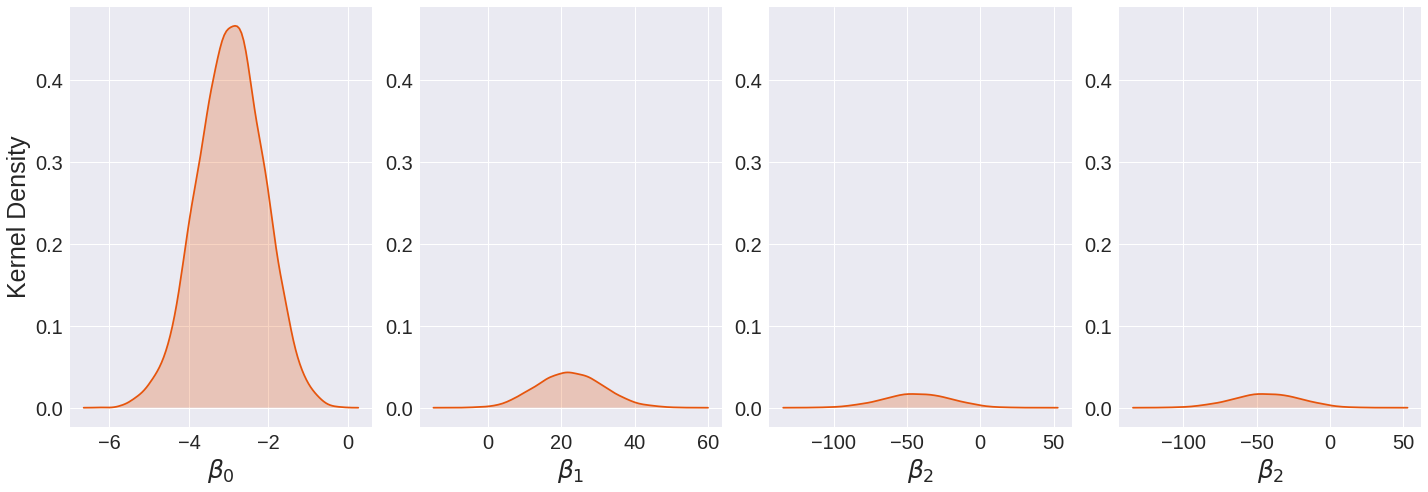

In [7]:
plt.subplots(1,1, figsize=(20,7), sharey=True)

plot01 = plt.subplot(1,4,1)
sns.kdeplot(beta0, shade=True, c='#e6550d')
plt.xlabel(r"$\beta_{0}$", fontsize=25)
plt.ylabel(r"Kernel Density", fontsize=25)
plt.tick_params('both', labelsize='20')

plt.subplot(1,4,2, sharey=plot01)
sns.kdeplot(beta1, shade=True, c='#e6550d')
plt.xlabel(r"$\beta_{1}$", fontsize=25)
plt.tick_params('both', labelsize='20')

plt.subplot(1,4,3, sharey=plot01)
sns.kdeplot(beta2, shade=True, c='#e6550d')
plt.xlabel(r"$\beta_{2}$", fontsize=25)
plt.tick_params('both', labelsize='20')

plt.subplot(1,4,4, sharey=plot01)
sns.kdeplot(beta2, shade=True, c='#e6550d')
plt.xlabel(r"$\beta_{2}$", fontsize=25)
plt.tick_params('both', labelsize='20')

plt.tight_layout()
plt.savefig('./../Model/Results/posterios_sharey_3d_teste.pdf', dpi=100)
plt.show()

### Not using the same y axis

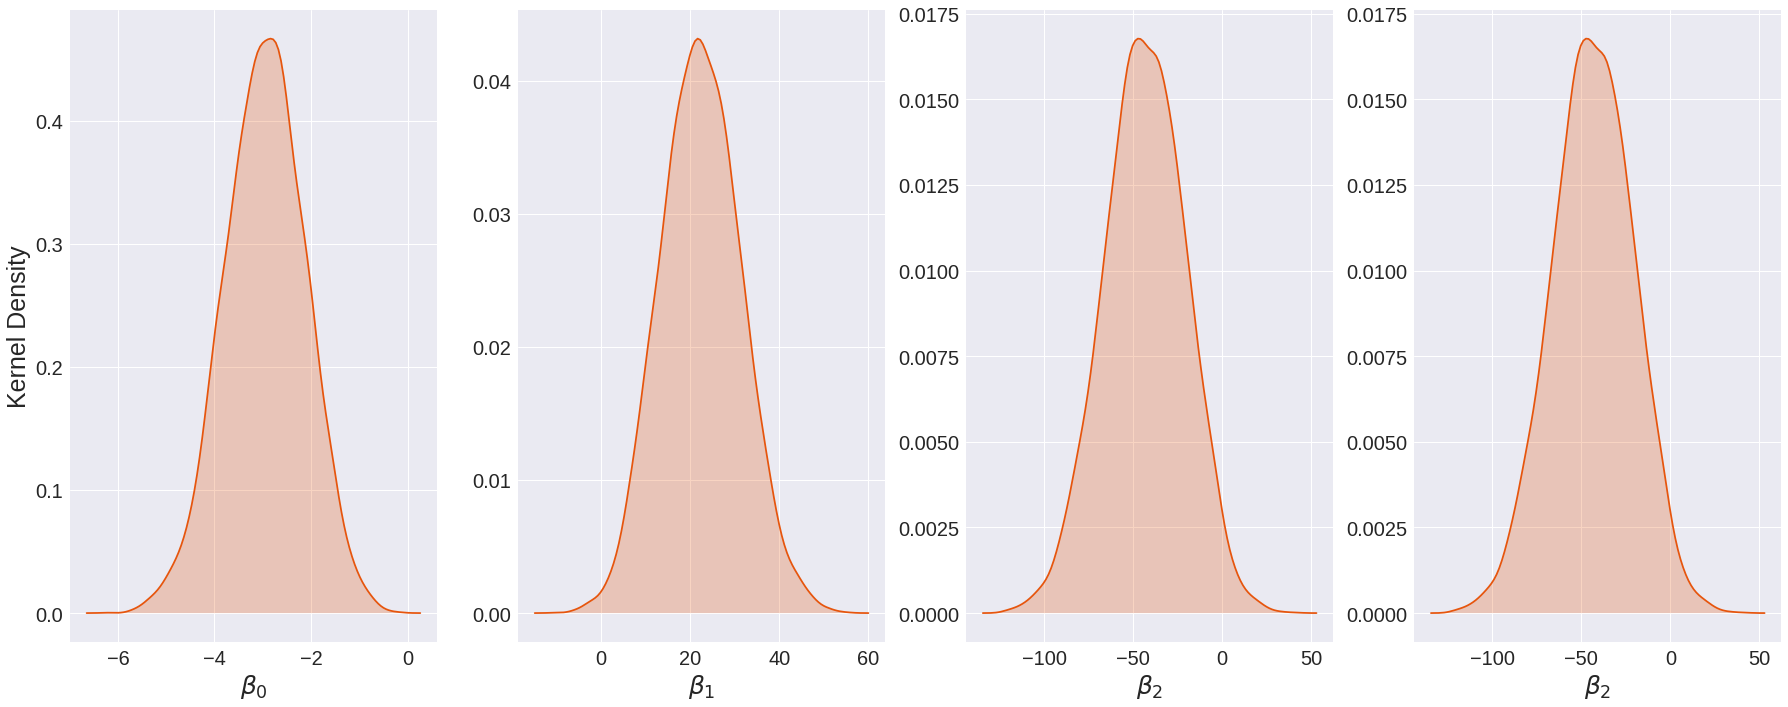

In [8]:
plt.subplots(1,1, figsize=(25,10), sharey=True)

plot01 = plt.subplot(1,4,1)
sns.kdeplot(beta0, shade=True, c='#e6550d')
plt.xlabel(r"$\beta_{0}$", fontsize=25)
plt.ylabel(r"Kernel Density", fontsize=25)
plt.tick_params('both', labelsize='20')

plt.subplot(1,4,2)
sns.kdeplot(beta1, shade=True, c='#e6550d')
plt.xlabel(r"$\beta_{1}$", fontsize=25)
plt.tick_params('both', labelsize='20')

plt.subplot(1,4,3)
sns.kdeplot(beta2, shade=True, c='#e6550d')
plt.xlabel(r"$\beta_{2}$", fontsize=25)
plt.tick_params('both', labelsize='20')

plt.subplot(1,4,4)
sns.kdeplot(beta2, shade=True, c='#e6550d')
plt.xlabel(r"$\beta_{2}$", fontsize=25)
plt.tick_params('both', labelsize='20')

plt.tight_layout()
plt.savefig('./../Model/Results/posterios_3d_teste.pdf', dpi=100)
plt.show()

# Checking if the columns are well split

In [9]:
diagnostics = []
for i in range(new_output.size):
    if len(new_output[i].split())<11:
        print i, len(new_output[i].split()),'\n'
        print new_output[i], '\n', new_output[i].split(), len(new_output[i].split())
        diagnostics.append(len(new_output[i].split()))
    else:
        continue
print np.unique(diagnostics)

707 10 

etanew[199]  -0.386  0.0097 0.5546 -1.488 -0.756 -0.386-7.082e-5 0.6787   3292 1.0002 
['etanew[199]', '-0.386', '0.0097', '0.5546', '-1.488', '-0.756', '-0.386-7.082e-5', '0.6787', '3292', '1.0002'] 10
993 10 

etanew[485]  0.0017  0.0022 0.1895 -0.375 -0.124-6.238e-5 0.1296 0.3755   7102 0.9999 
['etanew[485]', '0.0017', '0.0022', '0.1895', '-0.375', '-0.124-6.238e-5', '0.1296', '0.3755', '7102', '0.9999'] 10
1683 10 

etanew[1175] 0.0003   0.002 0.1295 -0.251 -0.0872.486e-5 0.0883 0.2541   4329 0.9999 
['etanew[1175]', '0.0003', '0.002', '0.1295', '-0.251', '-0.0872.486e-5', '0.0883', '0.2541', '4329', '0.9999'] 10
1994 10 

etanew[1486] 0.1257  0.0021 0.1892 -0.244-5.678e-5 0.1238 0.2532 0.5024   7926 0.9999 
['etanew[1486]', '0.1257', '0.0021', '0.1892', '-0.244-5.678e-5', '0.1238', '0.2532', '0.5024', '7926', '0.9999'] 10
[10]


### Fixing lines with problems

In [22]:
new_output[707]  = 'etanew[199]  -0.386   0.0097 0.5546 -1.488 -0.756   -0.386    -7.082e-5 0.6787 3292 1.0002'
new_output[993]  = 'etanew[485]   0.0017  0.0022 0.1895 -0.375 -0.124   -6.238e-5  0.1296   0.3755 7102 0.9999'
new_output[1683] = 'etanew[1175]  0.0003  0.002  0.1295 -0.251 -0.087    2.486e-5  0.0883   0.2541 4329 0.9999'
new_output[1994] = 'etanew[1486]  0.1257  0.0021 0.1892 -0.244 -5.678e-5 0.1238    0.2532   0.5024 7926 0.9999' 

# Shaping the results to be saved in a csv file

In [23]:
header_fit = output[4].split()
print header_fit

['mean', 'se_mean', 'sd', '2.5%', '25%', '50%', '75%', '97.5%', 'n_eff', 'Rhat']


In [24]:
header_addendum = 'parameter'
header_fit = [header_addendum] + header_fit
print header_fit

['parameter', 'mean', 'se_mean', 'sd', '2.5%', '25%', '50%', '75%', '97.5%', 'n_eff', 'Rhat']


In [25]:
new_data = list(np.zeros(len(header_fit)))
for i in range(new_output.size):
    if len(new_output[i].split())!=11:  # the length of the list must be 11, in which case we connect them directly
        print "there is a problem!"
    else:
        new_output_i = np.array(new_output[i].split()).reshape(1,11)
        new_data     = np.vstack((new_data, new_output_i))
new_data = new_data[1:,:]               # removing the zeroes in the beggining 

## Saving absolutely *everything* from the fit results

In [26]:
new_dataframe         = pd.DataFrame(new_data)
new_dataframe.columns = header_fit
new_dataframe.to_csv('./Results/fit_results_3d_teste.csv', sep=',', index=False)

## Saving the posteriors separately

In [27]:
betas = {}
betas['beta0'] = beta0
betas['beta1'] = beta1
betas['beta2'] = beta2
betas['beta3'] = beta3

In [28]:
betas_dataframe = pd.DataFrame(betas)
betas_dataframe.to_csv('./Results/betas_3d_teste.csv', sep=',', header=True, index=False)

# Extracting and saving *ONLY* what really matters for the analysis

In [29]:
parameters = new_data[:,0].astype(str)
pnew_idxs  = []
for i in range(parameters.size):
    if parameters[i][0:4]=='pnew':
        pnew_idxs.append(i)
    else:
        continue

In [30]:
model_results = np.column_stack((new_data[pnew_idxs,:], plot_x1, plot_x2.astype(int)))

In [31]:
model_results_df = pd.DataFrame(model_results)
model_results_df.columns = header_fit + ['Z', 'WHAN_CLASS']
model_results_df.to_csv('./Results/fit_results_3d_small_teste.csv', sep=',', header=True, index=False)

In [32]:
model_results_df

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,WHAN_CLASS
0,pnew[0],0.17,0.001,0.0497,0.0883,0.1342,0.1649,0.2009,0.2802,2624,1.0002,0.06794,0
1,pnew[1],0.1824,0.0009,0.0483,0.1012,0.1477,0.1782,0.2131,0.288,2699,1.0002,0.0736616326531,0
2,pnew[2],0.1953,0.0009,0.0468,0.1148,0.1619,0.1919,0.2252,0.2964,2795,1.0002,0.0793832653061,0
3,pnew[3],0.2085,0.0008,0.0452,0.1292,0.176,0.2058,0.2374,0.305,2915,1.0002,0.0851048979592,0
4,pnew[4],0.2221,0.0008,0.0436,0.1441,0.1911,0.2201,0.2502,0.3142,3064,1.0002,0.0908265306122,0
5,pnew[5],0.236,0.0007,0.0419,0.1598,0.2062,0.2344,0.2634,0.3228,3253,1.0002,0.0965481632653,0
6,pnew[6],0.25,0.0007,0.0404,0.1758,0.2212,0.2491,0.2763,0.3315,3489,1.0002,0.102269795918,0
7,pnew[7],0.2641,0.0006,0.0389,0.1918,0.2365,0.2634,0.2898,0.3423,3777,1.0002,0.107991428571,0
8,pnew[8],0.2783,0.0006,0.0377,0.207,0.2517,0.2774,0.3031,0.3549,4116,1.0001,0.113713061224,0
9,pnew[9],0.2924,0.0005,0.0368,0.2223,0.2669,0.2919,0.3166,0.3661,4488,1.0001,0.119434693878,0


In [33]:
print model_results_df.columns.values

['parameter' 'mean' 'se_mean' 'sd' '2.5%' '25%' '50%' '75%' '97.5%' 'n_eff'
 'Rhat' 'Z' 'WHAN_CLASS']
